In [ ]:
# Run the commands below on the google colab
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install numpy
# !pip install pyspark py4j

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.getOrCreate()
df = spark.read.option('inferSchema', 'true').csv('val_stats.csv', header = True)
df.createOrReplaceTempView('table_1')
print(df)


DataFrame[region: string, name: string, tag: string, rating: string, damage_round: double, headshots: string, headshot_percent: double, aces: int, clutches: int, flawless: int, first_bloods: string, kills: string, deaths: string, assists: string, kd_ratio: double, kills_round: double, most_kills: int, score_round: double, wins: int, win_percent: double, agent_1: string, agent_2: string, agent_3: string, gun1_name: string, gun1_head: int, gun1_body: int, gun1_legs: int, gun1_kills: string, gun2_name: string, gun2_head: int, gun2_body: int, gun2_legs: int, gun2_kills: string, gun3_name: string, gun3_head: int, gun3_body: int, gun3_legs: int, gun3_kills: int]


# Datas
show all available column in the data

In [ ]:
# insert the current query
df = spark.sql('''
SELECT * FROM table_1
''')

# convert the query answer into pandas
df = df.toPandas()

# show the table
df.head(10)

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
5,NA,Decay,#GODK,Radiant,134.1,"1,038",26.0,2,162,94,...,Phantom,35,62,3,144,Spectre,29,65,6,135
6,NA,Osias,#1212,Radiant,163.4,"1,472",25.2,7,186,92,...,Phantom,32,64,5,369,Sheriff,48,50,2,253
7,NA,Knights RIKU,#KRN,Radiant,153.3,510,17.5,2,112,64,...,Operator,6,93,1,318,Marshal,35,65,0,100
8,NA,RaijuACE,#3131,Radiant,153.7,"1,181",24.6,2,189,132,...,Vandal,36,59,5,626,Phantom,22,69,9,34
9,NA,dawn,#24k,Radiant,153.6,339,20.8,1,56,44,...,Operator,2,98,1,163,Spectre,23,70,6,85


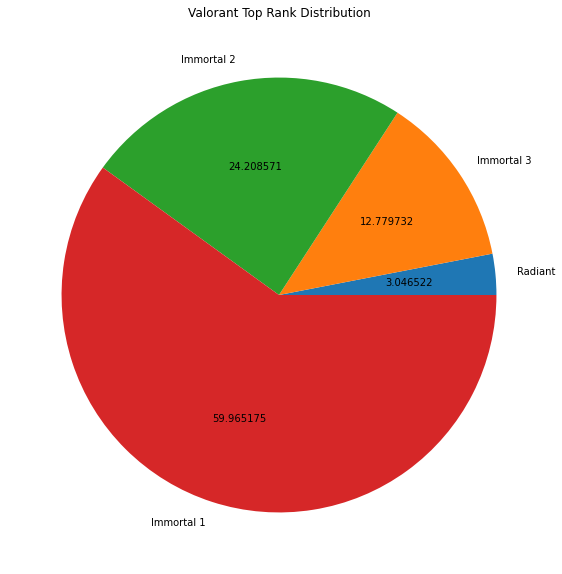

In [ ]:
rank = spark.sql('''
  SELECT COUNT(name) AS players,
    rating as rank
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY rank
  ORDER BY players
''')

rank = rank.toPandas()
# plot into pie chart
plt.pie(rank['players'], labels=rank['rank'], autopct='%f')
plt.title('Valorant Top Rank Distribution')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Top Pick Agent
Top pick Valorant Agent Distribution based on players playtime

    players     agents
0       135    Phoenix
1       461      Astra
2       461     Cypher
3       582       Yoru
4       597     Breach
5       625    Killjoy
6      1079       Neon
7      1768       Skye
8      1943      KAY/O
9      3396  Brimstone
10     3554      Viper
11     5171       Sage
12     5426       Fade
13     5812       Sova
14     5900       Omen
15     6019       Raze
16    11198      Reyna
17    11961       Jett
18    19485    Chamber


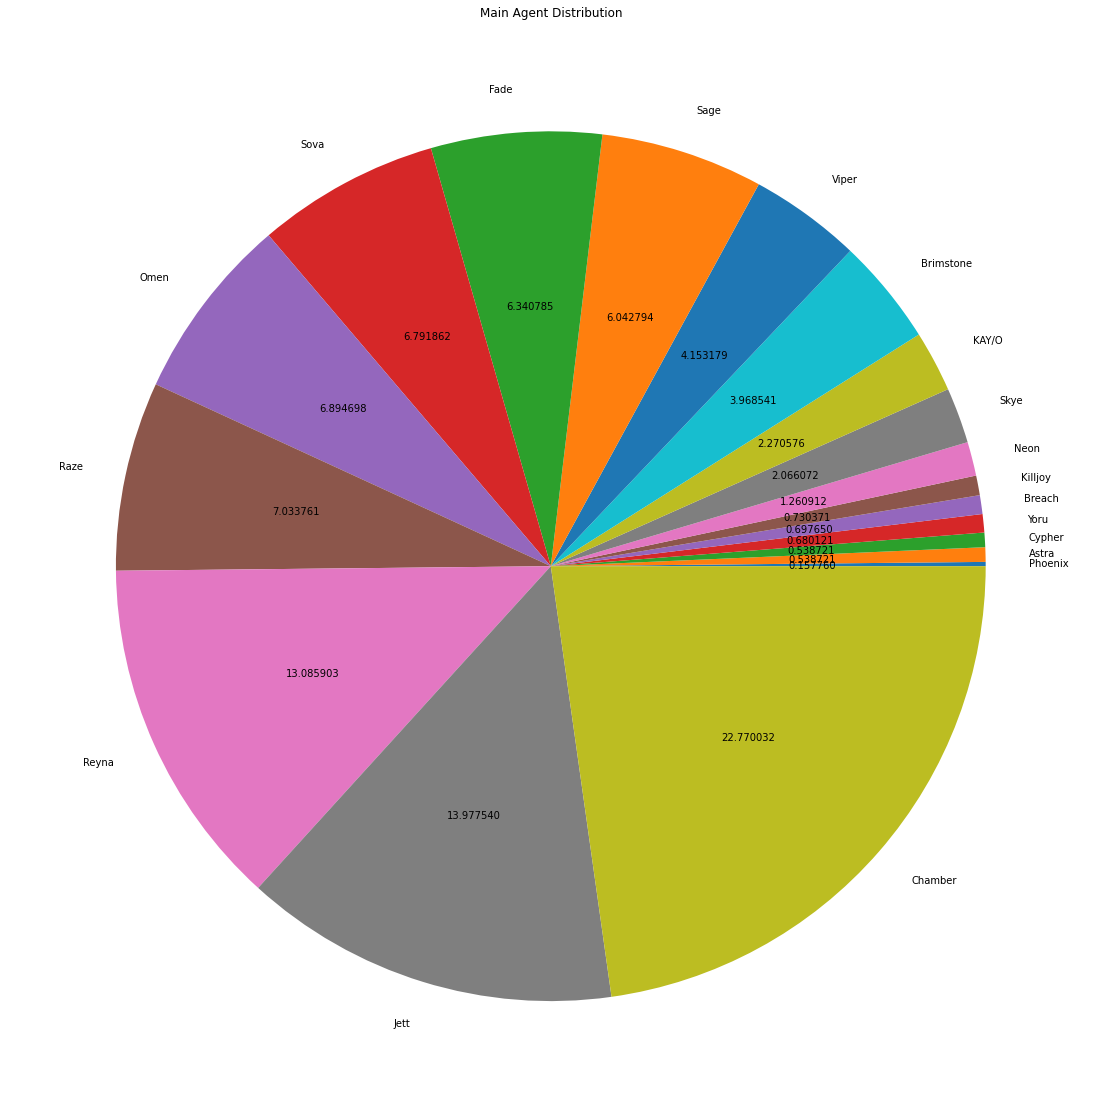

In [ ]:
agent_1 = spark.sql('''
  SELECT COUNT(name) as players,
    agent_1 as agents
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY agent_1
  ORDER BY players
''')

agent_1 = agent_1.toPandas()
print(agent_1)
# plot into pie chart
plt.pie(agent_1['players'], labels=agent_1['agents'], autopct='%f')
plt.title('Main Agent Distribution')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

          kd     agents
0   1.002167  Brimstone
1   1.002479       Sage
2   1.010352    Killjoy
3   1.010380      Viper
4   1.013461       Omen
5   1.017588     Breach
6   1.020108     Cypher
7   1.020391       Sova
8   1.020520      KAY/O
9   1.023433       Fade
10  1.028173       Skye
11  1.032603      Astra
12  1.051819       Raze
13  1.062678       Neon
14  1.070464       Yoru
15  1.073470       Jett
16  1.088400    Chamber
17  1.095141      Reyna
18  1.122000    Phoenix


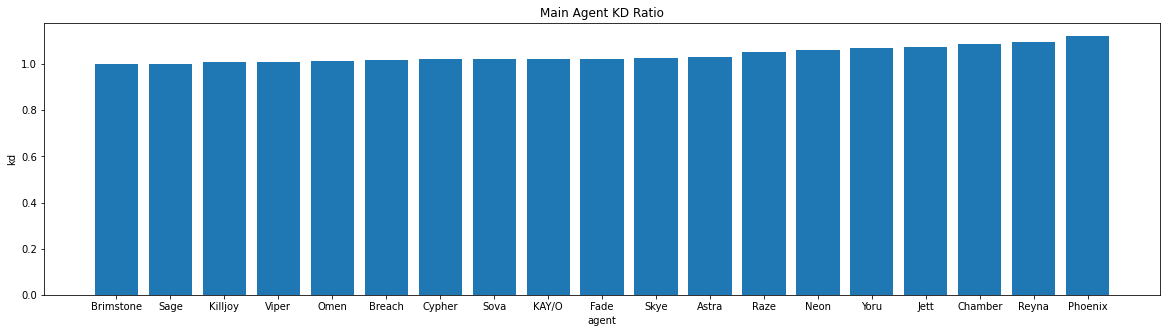

In [ ]:
agent_1_kd = spark.sql('''
  SELECT AVG(kd_ratio) as kd,
      agent_1 as agents
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY agent_1
  ORDER BY kd
''')

agent_1_kd = agent_1_kd.toPandas()
print(agent_1_kd)
# plot into bar chart
plt.bar(agent_1_kd['agents'], agent_1_kd['kd'])
plt.title('Main Agent KD Ratio')
plt.xlabel('agent')
plt.ylabel('kd')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

           wr     agents
0   53.156693       Jett
1   53.269480       Fade
2   53.456613      KAY/O
3   53.672668     Cypher
4   53.685805    Chamber
5   53.800310       Sova
6   53.811271       Omen
7   53.864000    Killjoy
8   53.890361       Neon
9   53.993072       Raze
10  54.151491      Viper
11  54.180184      Reyna
12  54.357045       Yoru
13  54.774187      Astra
14  54.811623       Sage
15  54.976472  Brimstone
16  55.002206       Skye
17  55.847906     Breach
18  56.383704    Phoenix


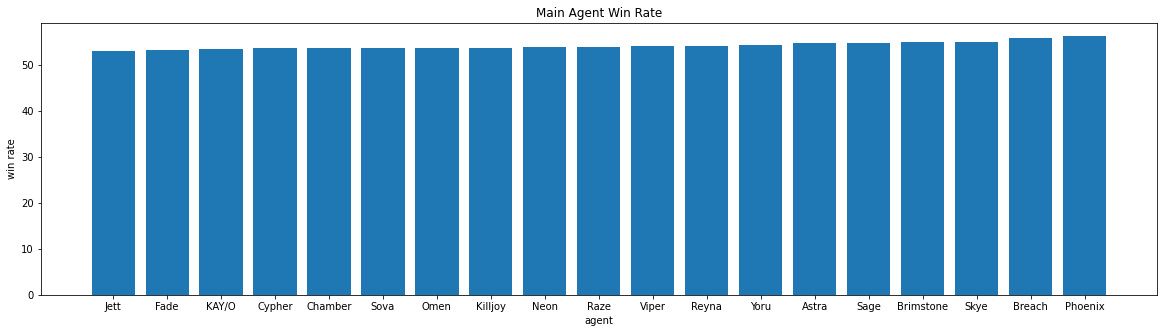

In [ ]:
agent_1_wr = spark.sql('''
  SELECT AVG(win_percent) as wr,
      agent_1 as agents
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY agent_1
  ORDER BY wr
''')

agent_1_wr = agent_1_wr.toPandas()
print(agent_1_wr)
# plot into bar chart
plt.bar(agent_1_wr['agents'], agent_1_wr['wr'])
plt.title('Main Agent Win Rate')
plt.xlabel('agent')
plt.ylabel('win rate')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

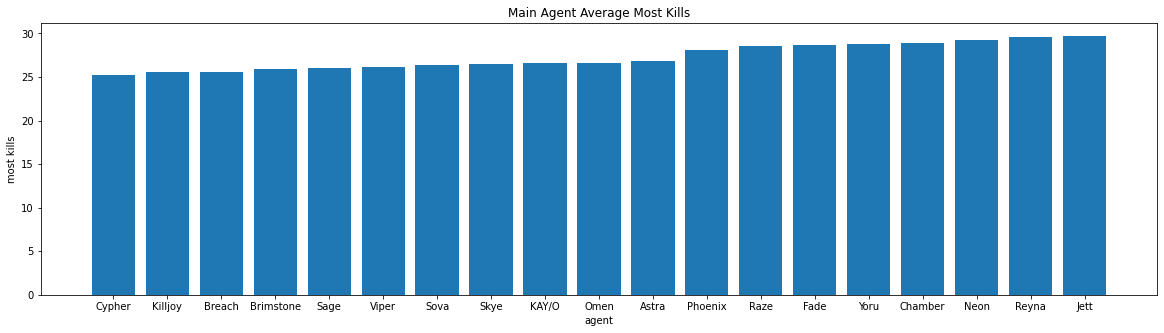

In [ ]:
agent_1_mk = spark.sql('''
  SELECT AVG(most_kills) as mk,
      agent_1 as agents
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY agent_1
  ORDER BY mk
''')

agent_1_mk = agent_1_mk.toPandas()
# plot into bar chart
plt.bar(agent_1_mk['agents'], agent_1_mk['mk'])
plt.title('Main Agent Average Most Kills')
plt.xlabel('agent')
plt.ylabel('most kills')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

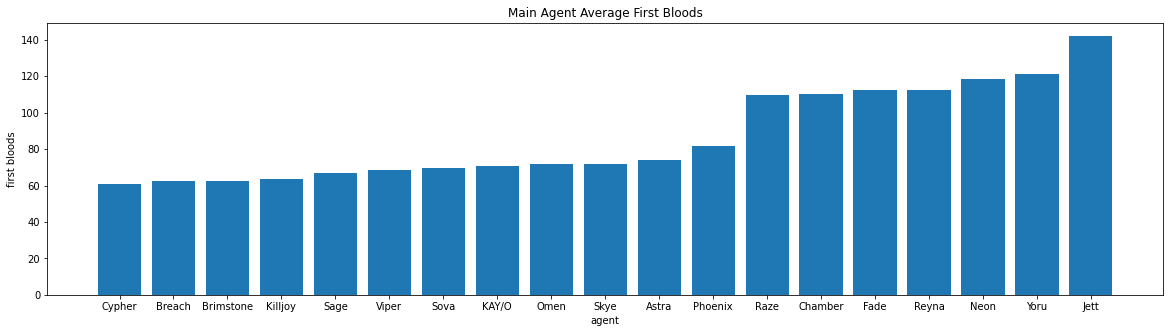

In [ ]:
agent_1_fb = spark.sql('''
  SELECT AVG(first_bloods) as fb,
      agent_1 as agents
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY agent_1
  ORDER BY fb
''')

agent_1_fb = agent_1_fb.toPandas()
# plot into bar chart
plt.bar(agent_1_fb['agents'], agent_1_fb['fb'])
plt.title('Main Agent Average First Bloods')
plt.xlabel('agent')
plt.ylabel('first bloods')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

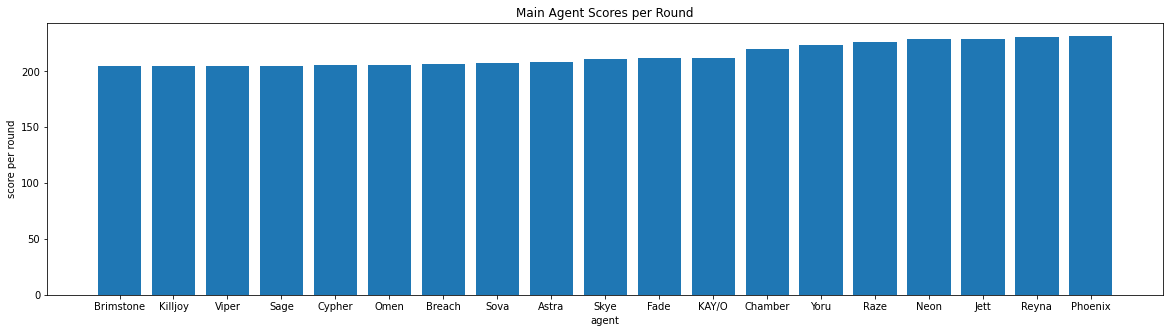

In [ ]:
agent_1_score = spark.sql('''
  SELECT AVG(score_round) as score,
      agent_1 as agents
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY agent_1
  ORDER BY score
''')

agent_1_score = agent_1_score.toPandas()
# plot into bar chart
plt.bar(agent_1_score['agents'], agent_1_score['score'])
plt.title('Main Agent Scores per Round')
plt.xlabel('agent')
plt.ylabel('score per round')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

# Weapon
Weapon distribution based on the gameplay time

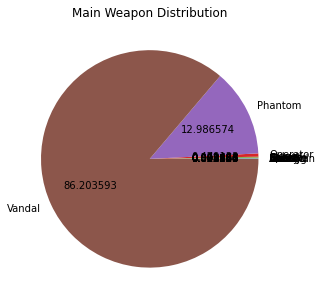

In [ ]:
guns = spark.sql('''
  SELECT COUNT(name) as users,
    gun1_name as guns
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY guns
  ORDER BY users
''')

guns = guns.toPandas()
# plot into pie chart
plt.pie(guns['users'], labels=guns['guns'], autopct='%f')
plt.title('Main Weapon Distribution')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

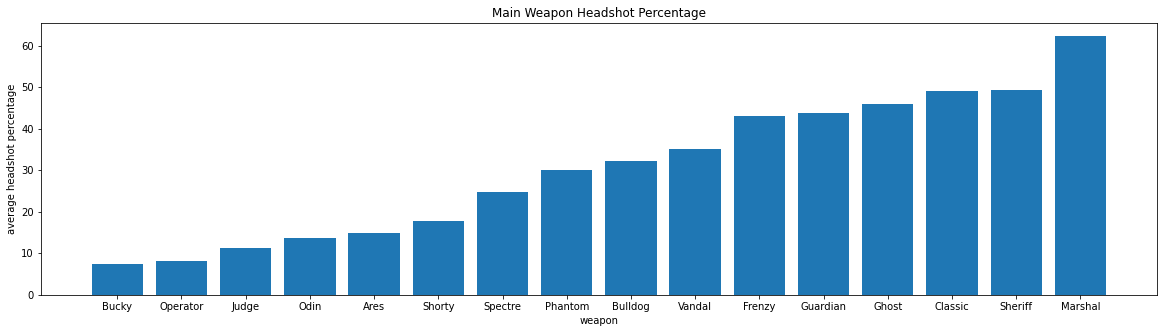

In [ ]:
gun_1_head = spark.sql('''
  SELECT AVG(gun1_head) as head_percent,
    gun1_name as guns
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY guns
  ORDER BY head_percent
''')

gun_1_head = gun_1_head.toPandas()
# plot into bar chart
plt.bar(gun_1_head['guns'], gun_1_head['head_percent'])
plt.title('Main Weapon Headshot Percentage')
plt.xlabel('weapon')
plt.ylabel('average headshot percentage')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

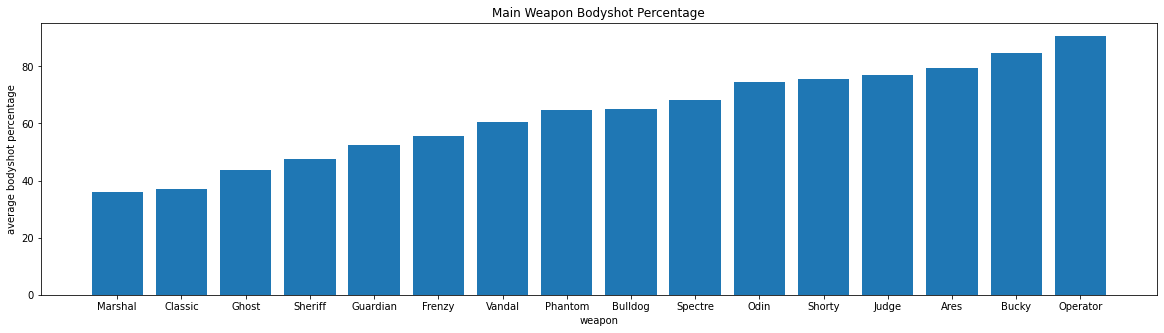

In [ ]:
gun_1_body = spark.sql('''
  SELECT AVG(gun1_body) as body_percent,
    gun1_name as guns
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY guns
  ORDER BY body_percent
''')

gun_1_body = gun_1_body.toPandas()
# plot into bar chart
plt.bar(gun_1_body['guns'], gun_1_body['body_percent'])
plt.title('Main Weapon Bodyshot Percentage')
plt.xlabel('weapon')
plt.ylabel('average bodyshot percentage')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

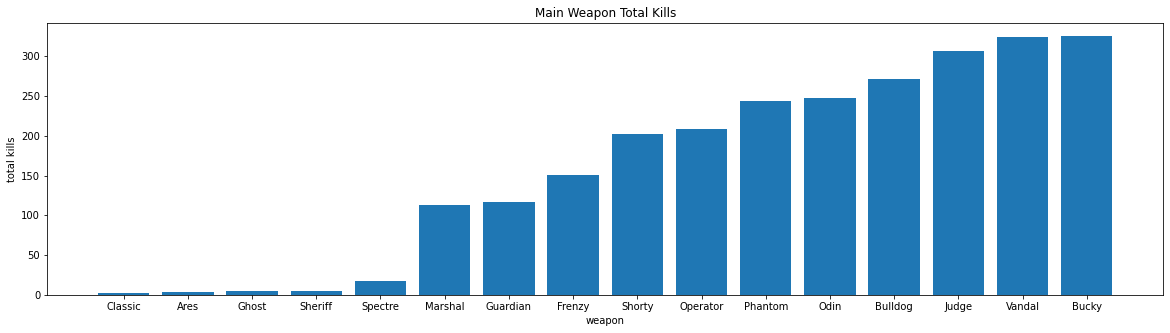

In [ ]:
gun_1_kill = spark.sql('''
  SELECT AVG(gun1_kills) as kill,
    gun1_name as guns
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY guns
  ORDER BY kill
''')

gun_1_kill = gun_1_kill.toPandas()
# plot into bar chart
plt.bar(gun_1_kill['guns'], gun_1_kill['kill'])
plt.title('Main Weapon Total Kills')
plt.xlabel('weapon')
plt.ylabel('total kills')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

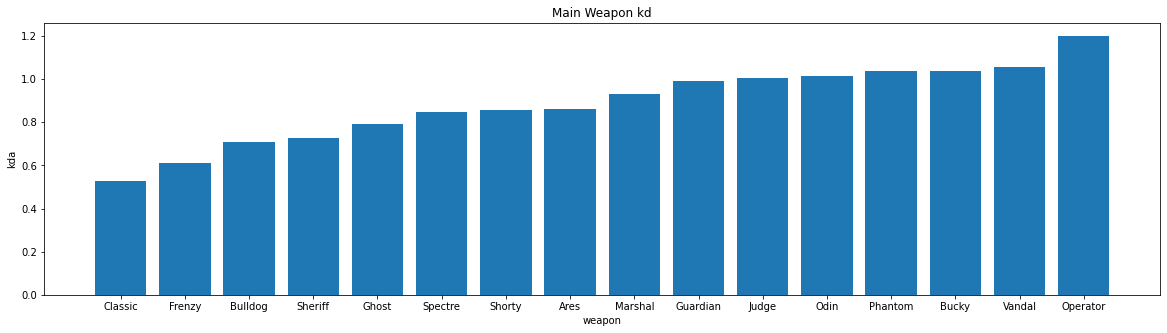

In [ ]:
gun_1_kda = spark.sql('''
  SELECT AVG(kd_ratio) as kd,
    gun1_name as guns
  FROM table_1
  WHERE rating LIKE '%Immortal%' OR rating LIKE 'Radiant'
  GROUP BY guns
  ORDER BY kd
''')

gun_1_kda = gun_1_kda.toPandas()
# plot into bar chart
plt.bar(gun_1_kda['guns'], gun_1_kda['kd'])
plt.title('Main Weapon kd')
plt.xlabel('weapon')
plt.ylabel('kda')
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()